In [ ]:
!nvidia-smi

In [ ]:
!pip install transformers
!pip install -U gradio
!pip install Image

## Markdown과 Label

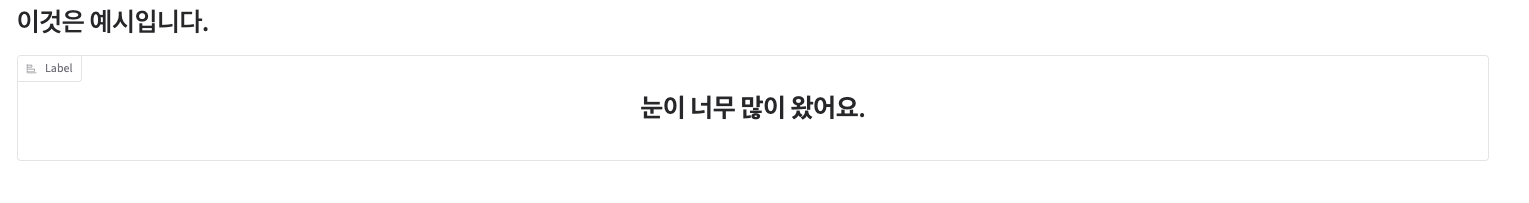

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("# 이것은 예시입니다.")
    gr.Label("눈이 너무 많이 왔어요.")
demo.launch(share=True)

## 1번 문제: Blocks 혹은 Interface를 활용하여 두 개의 숫자를 입력받아 사칙연산(더하기, 빼기, 곱하기, 나누기)를 수행하는 계산기를 만드시오.

### 조건
- 두 개의 입력 필드(Textbox 혹은 Number)와 하나의 버튼(Button)을 사용하시오.
- 결과를 표시하는 출력 컴포넌트를 추가하시오.
- 사용자가 선택한 연산자(더하기, 빼기 등)에 따라 결과를 계산하도록 하시오.

### 예시)
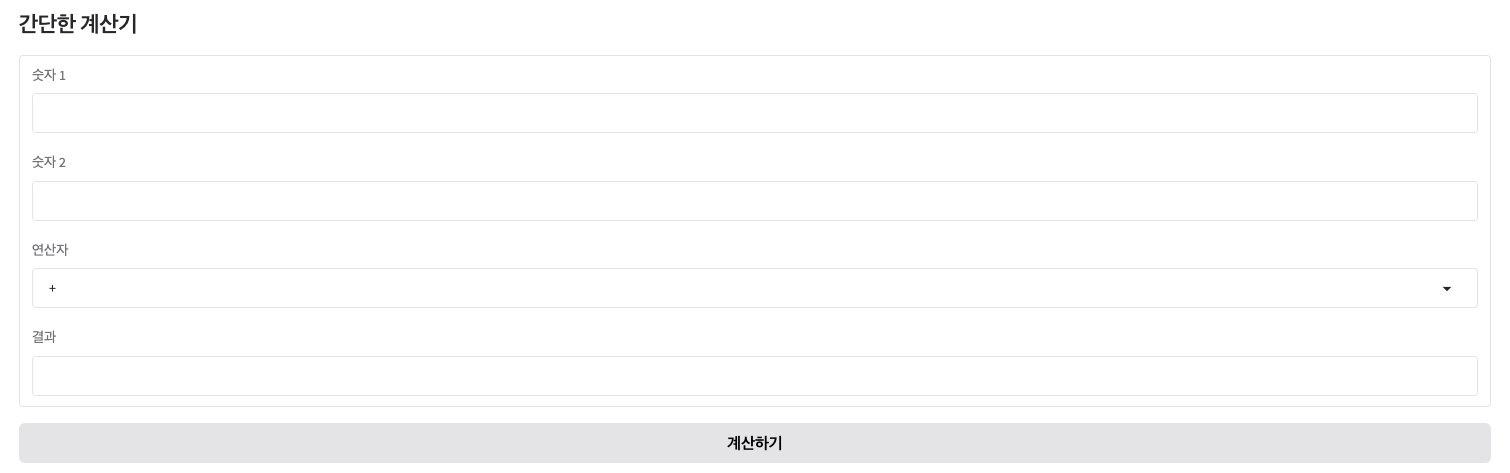
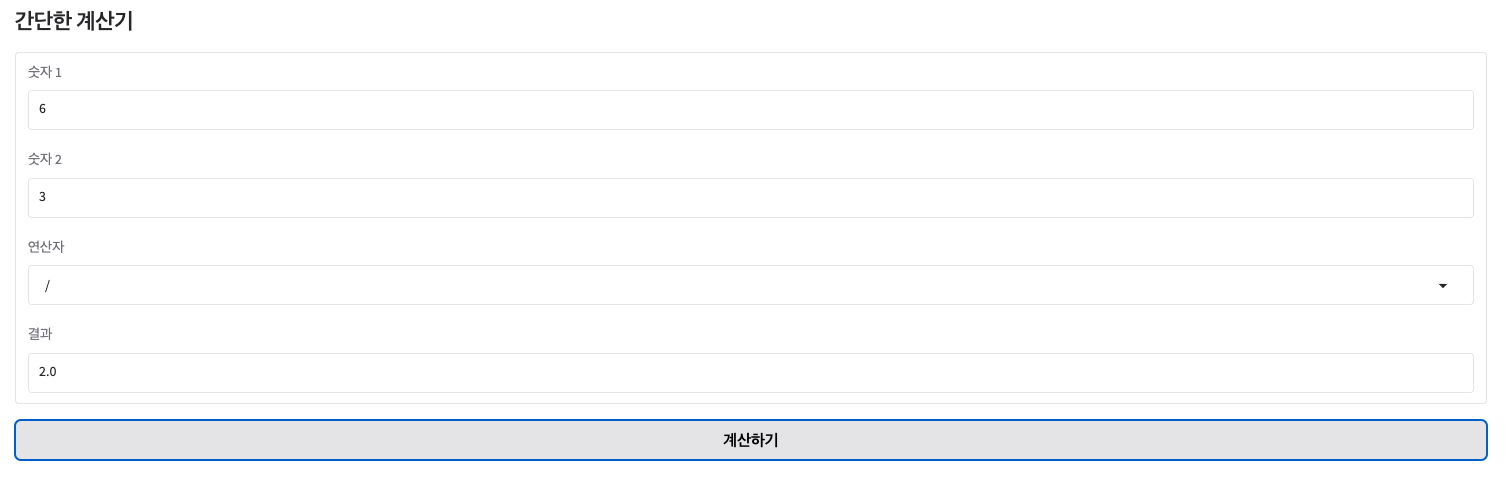

In [ ]:
import gradio as gr

def calculator(num1, num2, operation):
    try:
        num1, num2 = float(num1), float(num2)
        if operation == "+":
            return num1 + num2
        elif operation == "-":
            return num1 - num2
        elif operation == "*":
            return num1 * num2
        elif operation == "/":
            return num1 / num2 if num2 != 0 else "0으로 나눌 수 없습니다."
        else:
            return "잘못된 연산자입니다."
    except ValueError:
        return "숫자를 입력하세요."

with gr.Blocks() as calc_app:
    gr.Markdown("## 간단한 계산기")
    num1 = gr.Textbox(label="숫자 1")
    num2 = gr.Textbox(label="숫자 2")
    operation = gr.Dropdown(["+", "-", "*", "/"], label="연산자")
    result = gr.Textbox(label="결과", interactive=False)
    calc_button = gr.Button("계산하기")
    
    calc_button.click(calculator, inputs=[num1, num2, operation], outputs=result)

calc_app.launch(share=True)

## 2번 문제: 이미지 업로드 및 필터 적용하기
### 조건
- Image 컴포넌트를 활용해 이미지를 업로드할 수 있도록 만드시오.
- 사용자가 선택한 필터를 적용한 이미지를 출력하세요.

### 예시)
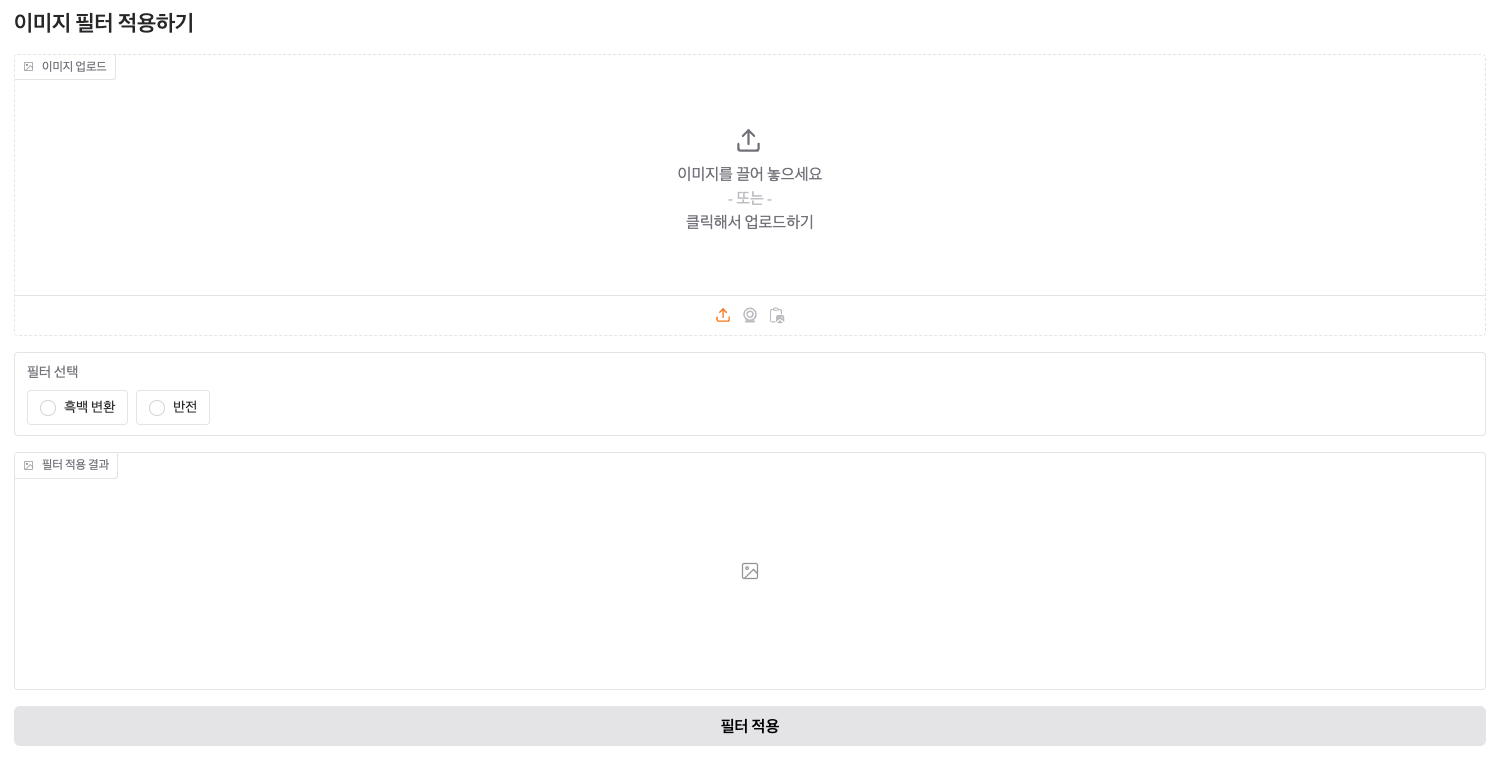

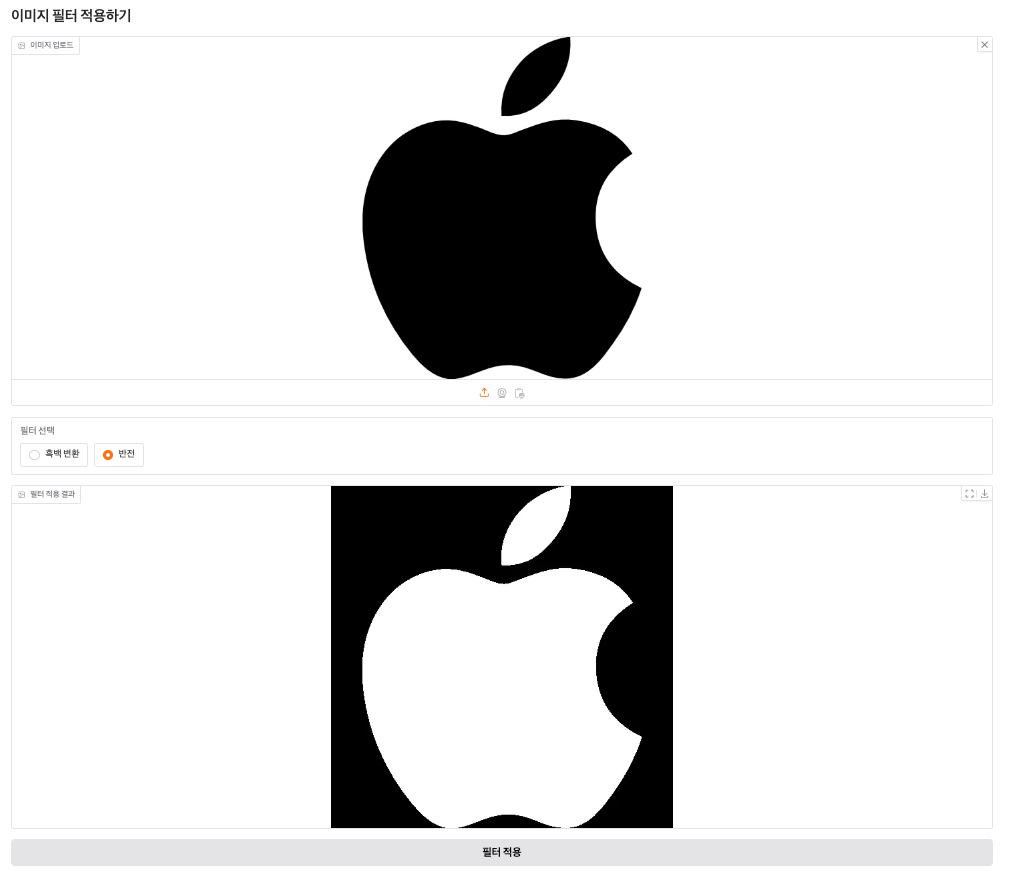


In [ ]:
from PIL import Image, ImageOps
import gradio as gr

def apply_filter(image, filter_type):
    img = Image.open(image).convert("RGB")
    if filter_type == "흑백 변환":
        return img.convert("L")
    elif filter_type == "반전":
        return ImageOps.invert(img)
    else:
        return "필터를 선택하세요."

with gr.Blocks() as image_filter_app:
    gr.Markdown("## 이미지 필터 적용하기")
    image_input = gr.Image(type="filepath", label="이미지 업로드")
    filter_type = gr.Radio(["흑백 변환", "반전"], label="필터 선택")
    image_output = gr.Image(label="필터 적용 결과")
    apply_button = gr.Button("필터 적용")
    
    apply_button.click(apply_filter, inputs=[image_input, filter_type], outputs=image_output)

image_filter_app.launch(share=True)

## 3번 문제: Gradio의 Tabs를 활용하여 하나의 앱에서 여러 기능을 제공하는 다기능 앱을 만드시오.

### 조건
#### 1) 첫 번째 탭 "텍스트 변환"
- 사용자가 입력한 텍스트를 대문자 또는 소문자로 변환하는 기능을 구현하시오.
- 변환 옵션은 Radio 컴포넌트로 제공하시오.
- 변환된 결과를 출력하시오.

#### 2) 두 번째 탭 "이미지 회전"
- 사용자가 이미지를 업로드하고, 회전 각도를 입력하면 해당 각도로 이미지를 회전시키는 기능을 구현하시오.
- 이미지 업로드는 Image 컴포넌트를 사용하시오.
- 회전 각도는 Slider 컴포넌트를 사용하시오.(초기화 값은 0, step은 1, 최고 360까지 가능하도록)
- 회전된 이미지를 출력하시오.

#### 활용되는 이모티콘 
- 🛠️, ✍️, 🖼️

### 예시)
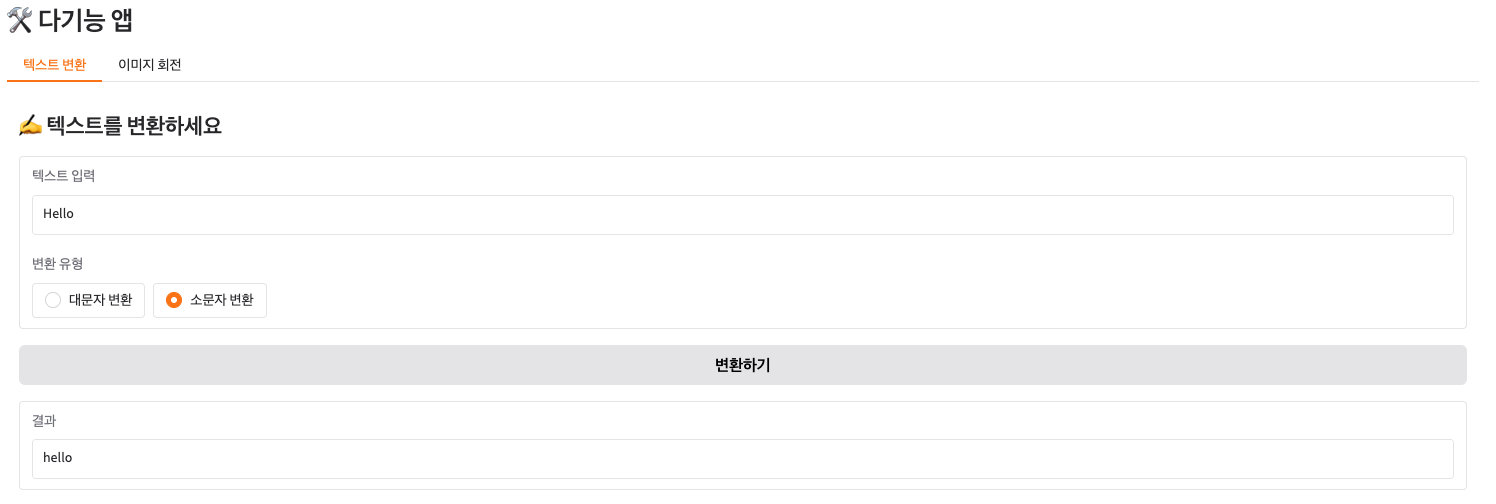
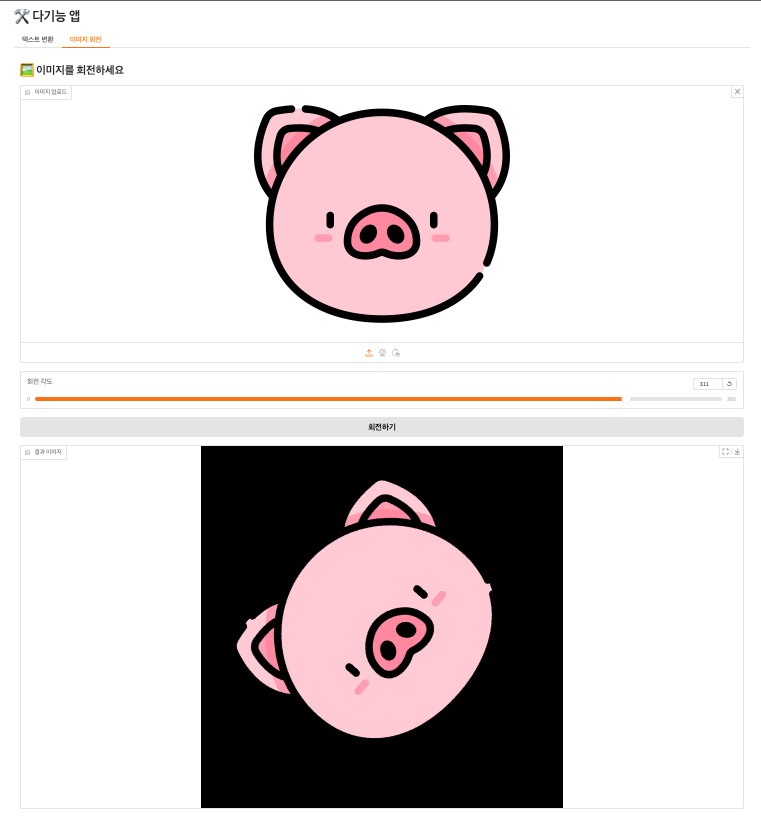


In [ ]:
import gradio as gr
from PIL import Image

def text_transform(text, transform_type):
    if transform_type == "대문자 변환":
        return text.upper()
    elif transform_type == "소문자 변환":
        return text.lower()
    else:
        return text

def rotate_image(image, angle):
    if image is None:
        return None
    img = Image.open(image).convert("RGB")
    rotated_img = img.rotate(-angle, expand=True)  # PIL에서는 시계 반대 방향이 +각도
    return rotated_img

with gr.Blocks() as multi_function_app:
    gr.Markdown("# 🛠️ 다기능 앱")

    with gr.Tab("텍스트 변환"):
        gr.Markdown("## ✍️ 텍스트를 변환하세요")
        text_input = gr.Textbox(label="텍스트 입력")
        transform_type = gr.Radio(["대문자 변환", "소문자 변환"], label="변환 유형")
        transform_button = gr.Button("변환하기")
        text_output = gr.Textbox(label="결과")

        transform_button.click(text_transform, inputs=[text_input, transform_type], outputs=text_output)

    with gr.Tab("이미지 회전"):
        gr.Markdown("## 🖼️ 이미지를 회전하세요")
        image_input = gr.Image(type="filepath", label="이미지 업로드")
        angle_slider = gr.Slider(0, 360, value=0, step=1, label="회전 각도")
        rotate_button = gr.Button("회전하기")
        image_output = gr.Image(label="결과 이미지")

        rotate_button.click(rotate_image, inputs=[image_input, angle_slider], outputs=image_output)

multi_function_app.launch(share=True)

## 4번: Layout Controlling의 신이 되어보자.


### 조건
- 제공되는 이모티콘은 다음과 같음: 📊, 📅, 💬, 📚, 📝, 📂, 📢, 🌦️
- 제일 큰 Column의 비율은 1:3:1의 비율로 설정.
- 메모 란은 5줄로 설정하며 placeholder을 반드시 사용

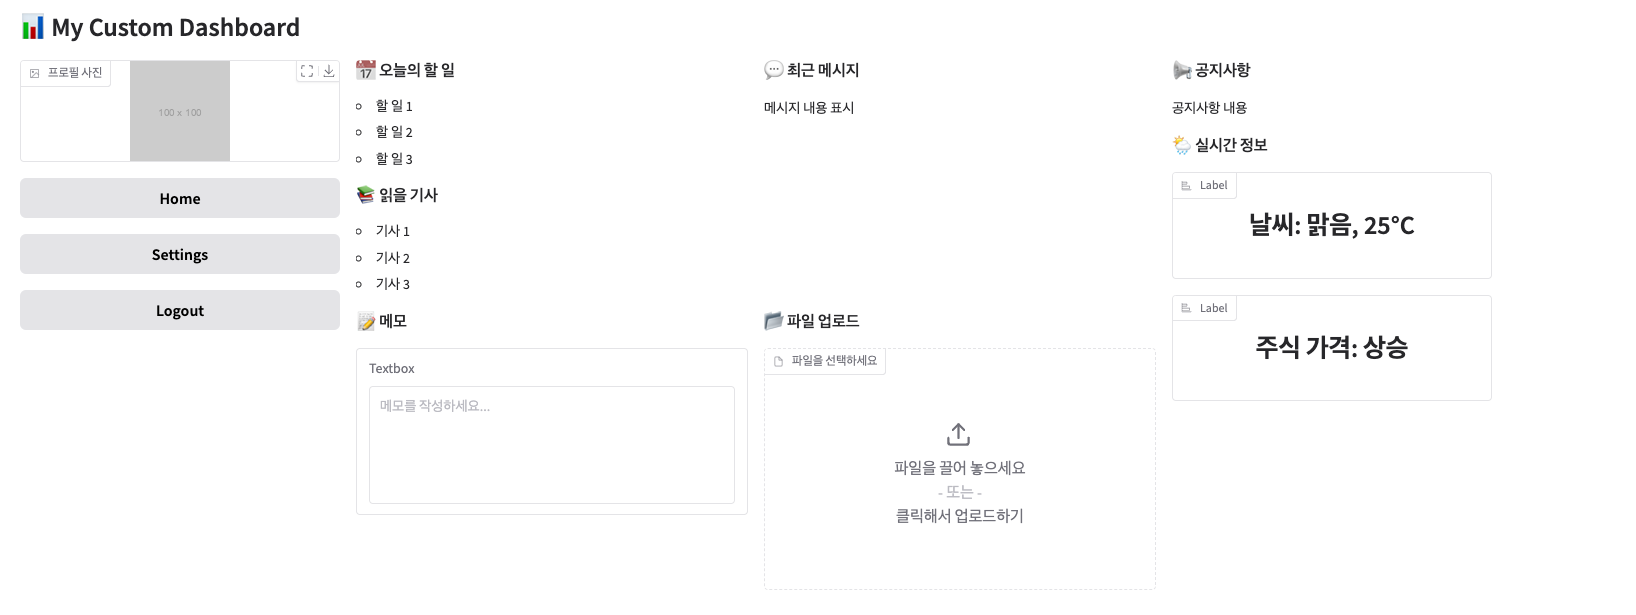

In [ ]:
import gradio as gr

with gr.Blocks() as dashboard:
    # 헤더 영역
    gr.Markdown("# 📊 My Custom Dashboard")
    
    with gr.Row():
        # 왼쪽 사이드바
        with gr.Column(scale=1):
            gr.Image("https://via.placeholder.com/100", label="프로필 사진")
            gr.Button("Home")
            gr.Button("Settings")
            gr.Button("Logout")
        
        # 중앙 콘텐츠 영역
        with gr.Column(scale=3):
            # 첫 번째 행
            with gr.Row():
                with gr.Column():
                    gr.Markdown("### 📅 오늘의 할 일")
                    gr.Markdown("- 할 일 1\n- 할 일 2\n- 할 일 3")
                with gr.Column():
                    gr.Markdown("### 💬 최근 메시지")
                    gr.Markdown("메시지 내용 표시")
                with gr.Column():
                    gr.Markdown("### 📚 읽을 기사")
                    gr.Markdown("- 기사 1\n- 기사 2\n- 기사 3")
            # 두 번째 행
            with gr.Row():
                with gr.Column():
                    gr.Markdown("### 📝 메모")
                    memo_input = gr.Textbox(lines=5, placeholder="메모를 작성하세요...")
                with gr.Column():
                    gr.Markdown("### 📂 파일 업로드")
                    file_upload = gr.File(label="파일을 선택하세요")
        
        # 오른쪽 사이드바
        with gr.Column(scale=1):
            gr.Markdown("### 📢 공지사항")
            gr.Markdown("공지사항 내용")
            gr.Markdown("### 🌦️ 실시간 정보")
            gr.Label("날씨: 맑음, 25°C")
            gr.Label("주식 가격: 상승")

dashboard.launch(share=True)


## 5번 문제: 실제 대화형 챗봇을 수행할 수 있는 모델을 불러와 이를 Gradio를 통해 배포하시오.

### 조건
- Chatbot, ClearButton, Textbox 컴포넌트들을 사용할 것

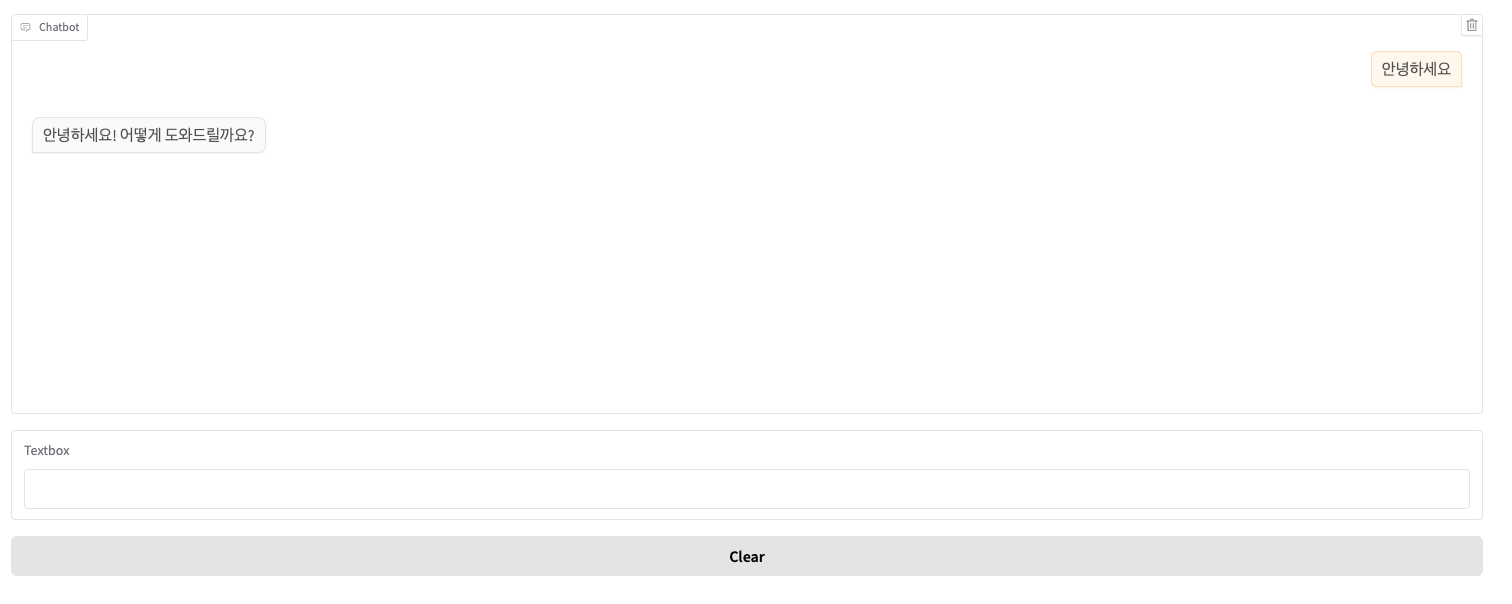

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = 'Bllossom/llama-3.2-Korean-Bllossom-3B'

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox()
    clear = gr.ClearButton([msg, chatbot])

    def respond(message, chat_history):
        instruction = message

        messages = [
            {"role": "user", "content": f"{instruction}"}
            ]

        input_ids = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)

        terminators = [
            tokenizer.convert_tokens_to_ids("<|end_of_text|>"),
            tokenizer.convert_tokens_to_ids("<|eot_id|>")
        ]

        outputs = model.generate(
            input_ids,
            max_new_tokens=1024,
            eos_token_id=terminators,
            do_sample=True,
            temperature=0.6,
            top_p=0.9
        )

        bot_message = tokenizer.decode(outputs[0][input_ids.shape[-1]:], skip_special_tokens=True)
        chat_history.append({"role": "user", "content": instruction})
        chat_history.append({"role": "assistant", "content": bot_message})
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])

demo.launch(share=True)
